# Note

- Retrain all GPs with 1000 iterations
- Maybe use up to 200 training points only
- Generate all MCMC samples (a script)

In [ ]:
import torch
import src.cosmofuncs as cf
import src.model as sm
import src.compression as sc 
import src.optimisation as so
import utils.helpers as hp
import setting as st

In [ ]:
model = sm.AppMag(load_data=True)

### Optimisation

In [ ]:
opt = so.GradientDescent(load_data = True)

In [ ]:
start = torch.tensor([0.1, -0.5, -18.0, 0.0, 0.1, 2.])

In [ ]:
# d = opt.run(start, 50, eps = 1E-5, save = False)

### Test for Compression

In [ ]:
model_exp, grad_exp, hess_exp = model.theory_expansion(model.mle)

In [ ]:
param = torch.tensor([0.15, -0.7, -19.04, -0.04, 0.125, 2.60])

In [ ]:
exact = model.theory_only(param)

In [ ]:
test_1 = model.approximate_theory(param, second=False)

In [ ]:
test_2 = model.approximate_theory(param, second=True)

In [ ]:
exact[0:3]

In [ ]:
test_1[0:3]

In [ ]:
test_2[0:3]

### Compression Part

In [ ]:
comp = sc.moped(load_data = True)

In [ ]:
moped_vectors = comp.vectors(model.mle)

In [ ]:
comp.compute_coefficients(exact)

In [ ]:
comp.compute_coefficients(test_1)

In [ ]:
comp.compute_coefficients(test_2)

In [ ]:
# nui_cov = 5.*model.param_cov[2:,2:]
# nui_cov_round = 1E-4 * torch.round(1E4 * nui_cov)
# torch.linalg.cholesky(nui_cov_round)

# Generate Training Points

In [1]:
import src.trainingpoints as stp

In [2]:
module = stp.simulations(load_data = True)

In [3]:
module.precomputations(save=False)

No expansion point provided. Using the Maximum Likelihood Estimator.
0 0 :  1.0000
1 0 : -0.0000
1 1 :  1.0000
2 0 : -0.0000
2 1 :  0.0000
2 2 :  1.0000
3 0 :  0.0000
3 1 : -0.0000
3 2 : -0.0000
3 3 :  1.0000
4 0 :  0.0000
4 1 : -0.0000
4 2 : -0.0000
4 3 : -0.0000
4 4 :  1.0000
5 0 :  0.0000
5 1 : -0.0000
5 2 : -0.0000
5 3 : -0.0000
5 4 : -0.0000
5 5 :  1.0000


In [4]:
module.forward(save=True)

## Plot the residuals

500 training points here

In [5]:
import pandas as pd 
import matplotlib.pylab as plt 

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [6]:
for num in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:

    csv = pd.read_csv('outputs/simulations_'+str(num)+'.csv')

    diff_1 = csv[['exact_minus_first_{}'.format(i+1) for i in range(6)]]
    diff_2 = csv[['exact_minus_second_{}'.format(i+1) for i in range(6)]]

    plt.figure(figsize = (18, 12))
    plt.subplot(231)
    plt.hist(diff_1.exact_minus_first_1, density = True, edgecolor='b', linewidth=1.2, alpha = 0.9, color='skyblue')
    plt.hist(diff_2.exact_minus_second_1, density = True, edgecolor='g', linewidth=1.2, alpha = 0.5, color = 'green')
    plt.xlabel(r'$\Delta y_{1}$', fontsize = fontSize)
    plt.tick_params(axis='x', labelsize=fontSize)
    plt.tick_params(axis='y', labelsize=fontSize)

    plt.subplot(232)
    plt.hist(diff_1.exact_minus_first_2, density = True, edgecolor='b', linewidth=1.2, alpha = 0.9, color='skyblue')
    plt.hist(diff_2.exact_minus_second_2, density = True, edgecolor='g', linewidth=1.2, alpha = 0.5, color = 'green')
    plt.xlabel(r'$\Delta y_{2}$', fontsize = fontSize)
    plt.tick_params(axis='x', labelsize=fontSize)
    plt.tick_params(axis='y', labelsize=fontSize)

    plt.subplot(233)
    plt.hist(diff_1.exact_minus_first_3, density = True, edgecolor='b', linewidth=1.2, alpha = 0.9, color='skyblue')
    plt.hist(diff_2.exact_minus_second_3, density = True, edgecolor='g', linewidth=1.2, alpha = 0.5, color = 'green')
    plt.xlabel(r'$\Delta y_{3}$', fontsize = fontSize)
    plt.tick_params(axis='x', labelsize=fontSize)
    plt.tick_params(axis='y', labelsize=fontSize)

    plt.subplot(234)
    plt.hist(diff_1.exact_minus_first_4, density = True, edgecolor='b', linewidth=1.2, alpha = 0.9, color='skyblue')
    plt.hist(diff_2.exact_minus_second_4, density = True, edgecolor='g', linewidth=1.2, alpha = 0.5, color = 'green')
    plt.xlabel(r'$\Delta y_{4}$', fontsize = fontSize)
    plt.tick_params(axis='x', labelsize=fontSize)
    plt.tick_params(axis='y', labelsize=fontSize)

    plt.subplot(235)
    plt.hist(diff_1.exact_minus_first_5, density = True, edgecolor='b', linewidth=1.2, alpha = 0.9, color='skyblue')
    plt.hist(diff_2.exact_minus_second_5, density = True, edgecolor='g', linewidth=1.2, alpha = 0.5, color = 'green')
    plt.xlabel(r'$\Delta y_{5}$', fontsize = fontSize)
    plt.tick_params(axis='x', labelsize=fontSize)
    plt.tick_params(axis='y', labelsize=fontSize)

    plt.subplot(236)
    plt.hist(diff_1.exact_minus_first_6, density = True, edgecolor='b', linewidth=1.2, alpha = 0.9, color='skyblue')
    plt.hist(diff_2.exact_minus_second_6, density = True, edgecolor='g', linewidth=1.2, alpha = 0.5, color = 'green')
    plt.xlabel(r'$\Delta y_{6}$', fontsize = fontSize)
    plt.tick_params(axis='x', labelsize=fontSize)
    plt.tick_params(axis='y', labelsize=fontSize)
    
    plt.savefig('plots/residuals_'+str(num)+'.png', bbox_inches = 'tight')
    plt.savefig('plots/residuals_'+str(num)+'.pdf', bbox_inches = 'tight')
    
    plt.close()

### 2D Function 

This is to test the latest GP routine we have written in PyTorch. 

$$
z = \textrm{sin }x_{1} + \textrm{cos }x_{2}
$$

$$
\nabla z=\left(\begin{array}{c}
\textrm{cos }x_{1}\\
\textrm{-sin }x_{2}
\end{array}\right)
$$

$$
\nabla^{2}z=\left(\begin{array}{cc}
-\textrm{sin }x_{1} & 0\\
0 & -\textrm{cos }x_{2}
\end{array}\right)
$$

and if we choose a test point $(\frac{\pi}{4}, \frac{\pi}{4})$, then the first and second derivatives are:


$$
\nabla z=\left(\begin{array}{c}
\frac{1}{\sqrt{2}}\\
-\frac{1}{\sqrt{2}}
\end{array}\right)
$$

$$
\nabla^{2}z=\left(\begin{array}{cc}
-\frac{1}{\sqrt{2}} & 0\\
0 & -\frac{1}{\sqrt{2}}
\end{array}\right)
$$

$\frac{1}{\sqrt{2}}\approx 0.707$

In [ ]:
import torch
import numpy as np 
import matplotlib.pylab as plt 
from src.gp.gaussianprocess import GaussianProcess

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

Generate some training points 

In [ ]:
ntrain = 100
x = torch.rand((ntrain,2))
y = torch.sin(x[:,0]) + torch.cos(x[:,1])

In [ ]:
GP_module = GaussianProcess(x, y, 1E-5)

#### Learn the kernel hyperparameters. 
- The starting point is generated randomly. 
- The number of iterations is 500. 
- The learning rate (optimisation step) is 0.01 (a very small learning rate might not ensure convergence). 
- To avoid local minima, the optimisation procedure is restarted 3 times (below). 

In [ ]:
start = torch.randn((3,))
niter = 500
lr = 0.01
nrestart = 3 

d = GP_module.optimisation(parameters = start, niter = niter, lr = lr, nrestart = nrestart)

In [ ]:
index = np.arange(1, niter+2, 1)

plt.figure(figsize = (12, 8))
plt.plot(index, d[0]['loss'], lw = 2, label = 'Optimisation 1')
plt.plot(index, d[1]['loss'], lw = 2, label = 'Optimisation 2')
plt.plot(index, d[2]['loss'], lw = 2, label = 'Optimisation 3')
plt.ylabel(r'$J(\nu)$', fontsize = fontSize)
plt.xlabel(r'Optimisation Step', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(min(index), max(index))
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()

#### Prediction

In [ ]:
testpoint = torch.tensor([torch.pi/4, torch.pi/4])

In [ ]:
GP_module.prediction(testpoint, variance=True)

#### Gradient and Second Derivatives

In [ ]:
GP_module.derivatives(testpoint, order = 1)

In [ ]:
GP_module.derivatives(testpoint, order = 2)

# Residuals

In [ ]:
csv = pd.read_csv('outputs/simulations_'+str(num)+'.csv')

diff_1 = csv[['exact_minus_first_{}'.format(i+1) for i in range(6)]]
diff_2 = csv[['exact_minus_second_{}'.format(i+1) for i in range(6)]]

In [ ]:
inputs = torch.from_numpy(csv.iloc[:,0:6].values)

In [ ]:
output = torch.from_numpy(diff_1.iloc[:,0].values)

In [ ]:
GP_module = GaussianProcess(inputs, output, 1E-5)

In [ ]:
start = torch.randn((inputs.shape[1]+1,))
niter = 500
lr = 0.01
nrestart = 3 

d = GP_module.optimisation(parameters = start, niter = niter, lr = lr, nrestart = nrestart)

In [ ]:
index = np.arange(1, niter+2, 1)

plt.figure(figsize = (12, 8))
plt.plot(index, d[0]['loss'], lw = 2, label = 'Optimisation 1')
plt.plot(index, d[1]['loss'], lw = 2, label = 'Optimisation 2')
plt.plot(index, d[2]['loss'], lw = 2, label = 'Optimisation 3')
plt.ylabel(r'$J(\nu)$', fontsize = fontSize)
plt.xlabel(r'Optimisation Step', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.xlim(min(index), max(index))
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()

# Train Residuals with GPs

In [5]:
import torch
import numpy as np 
import matplotlib.pylab as plt 
from src.gp.training import Optimisation
import setting as st 

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [6]:
test = Optimisation('simulations_'+str(st.NLHS))

In [9]:
rec = test.train(second=True, jitter = 1E-5, save = True, niter = 1000, l_rate = 0.01, nrestart = 3)

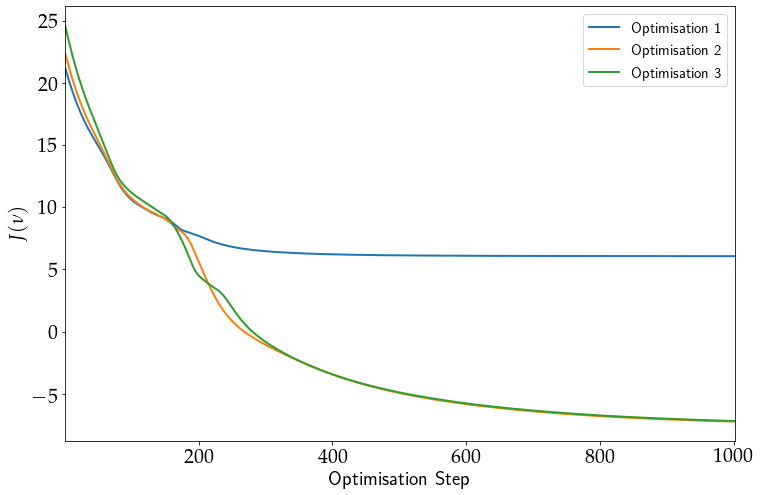

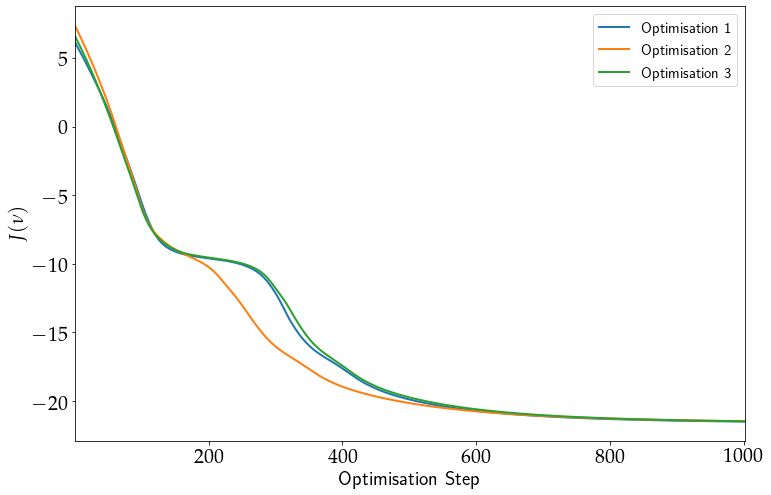

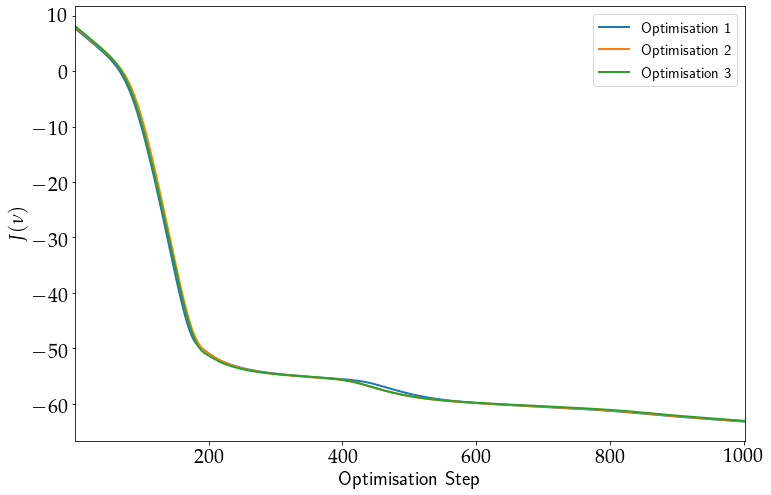

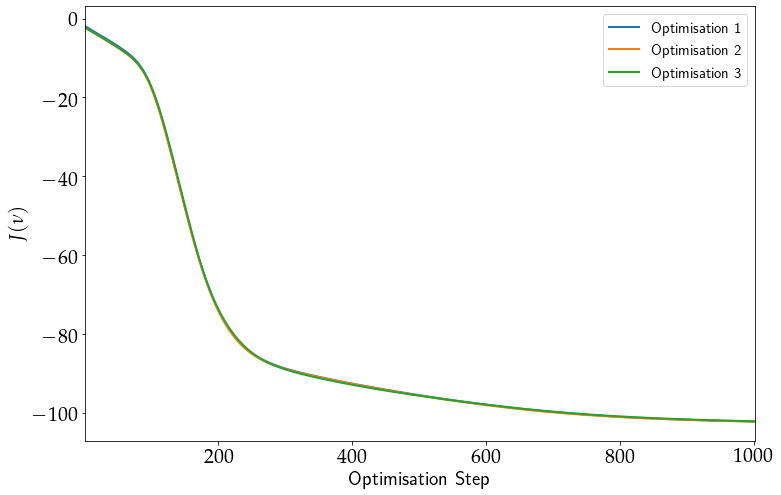

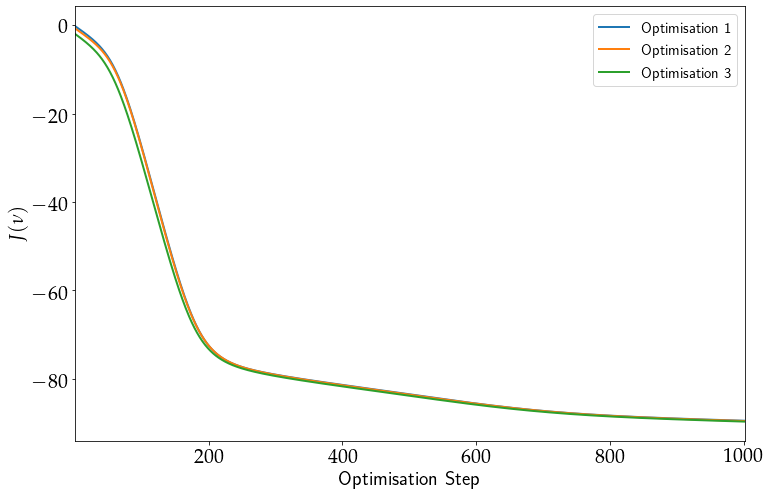

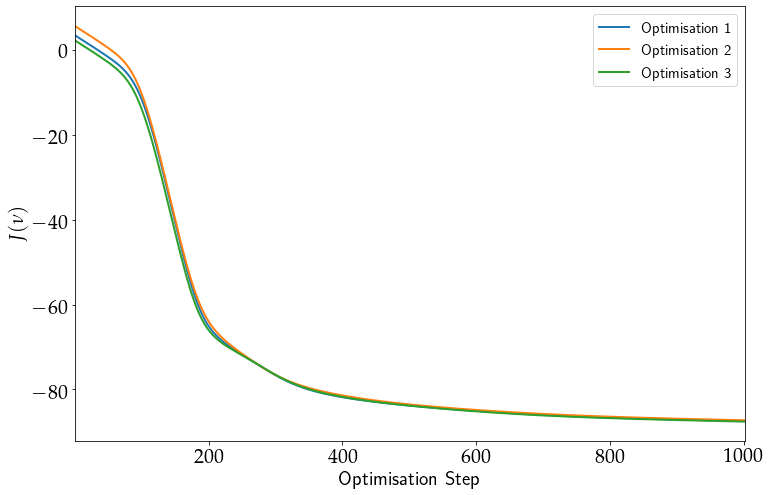

In [10]:
index = np.arange(1, 1002, 1)

for i in range(6):
    
    plt.figure(figsize = (12, 8))
    plt.plot(index, rec[i][0]['loss'], lw = 2, label = 'Optimisation 1')
    plt.plot(index, rec[i][1]['loss'], lw = 2, label = 'Optimisation 2')
    plt.plot(index, rec[i][2]['loss'], lw = 2, label = 'Optimisation 3')
    plt.ylabel(r'$J(\nu)$', fontsize = fontSize)
    plt.xlabel(r'Optimisation Step', fontsize = fontSize)
    plt.tick_params(axis='x', labelsize=fontSize)
    plt.tick_params(axis='y', labelsize=fontSize)
    plt.xlim(min(index), max(index))
    plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
    plt.show()

In [ ]:
import utils.helpers as hp

In [ ]:
details = hp.read_list('outputs', 'gps_first_details')

In [ ]:
gps = hp.read_list('outputs', 'gps_first_modules')

In [ ]:
test = gps[0]

In [ ]:
test.prediction(torch.tensor([0.15, -0.7, -19.04, -0.04, 0.125, 2.60]))

In [ ]:
test.derivatives(torch.tensor([0.15, -0.7, -19.04, -0.04, 0.125, 2.60]))

### Testing Emulation

In [ ]:
import torch
from src.emulation import forwardModel

point = torch.tensor([0.45, -0.7, -19.04, -0.04, 0.125, 2.60])

In [ ]:
test = forwardModel(emulator = True, method='second', variance=True)

In [ ]:
test.compression(point)

In [ ]:
# Exact: tensor([-1.1465e+03, -5.4199e+02,  6.9905e+02,  8.8556e-01,  1.4374e+01, 3.2954e+01])
# First: tensor([-1.1451e+03, -5.4247e+02,  6.9904e+02,  8.8627e-01,  1.4376e+01, 3.2955e+01])
# Second: tensor([-1.1468e+03, -5.4174e+02,  6.9908e+02,  8.8364e-01,  1.4371e+01, 3.2951e+01])
# First + GP: tensor([-1.1451e+03, -5.4199e+02,  6.9905e+02,  8.8360e-01,  1.4374e+01, 3.2954e+01])
# Second + GP: tensor([-1.1465e+03, -5.4199e+02,  6.9905e+02,  8.8219e-01,  1.4373e+01, 3.2955e+01])

### MCMC
- The second order approximation works fine 
- The first order approximation is not very good (need a transformation in y)

### To Do 
- Generate the posterior with the first model (first order Taylor series expansion)
- Generate the posterior with the second model (second order Taylor series expansion)

In [53]:
gp = sampling_first.gps[0]

In [54]:
ytrain = gp.ytrain * gp.ytrain_std + gp.ytrain_mean

In [55]:
ytrain = ytrain.view(-1)

In [56]:
miny = torch.min(ytrain)

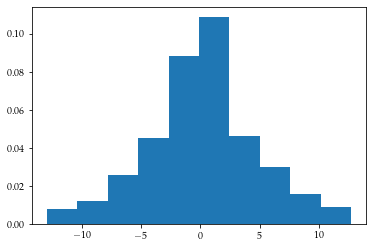

In [58]:
plt.figure()
plt.hist(ytrain, density = True)
plt.show()

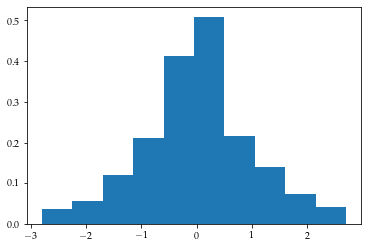

In [59]:
plt.figure()
plt.hist(gp.ytrain.view(-1), density = True)
plt.show()

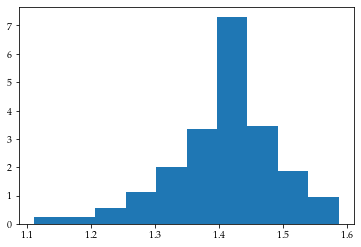

In [60]:
plt.figure()
plt.hist(torch.log10(ytrain - 2*miny), density = True)
plt.show()

In [1]:
from src.sampling import MCMC
import numpy as np
import torch
import setting as st 

In [15]:
st.NLHS = 800

In [2]:
sampling_exact = MCMC(emulator = False, method = 'exact', variance = False)
# sampling_first = MCMC(emulator = True, method = 'first', variance = False)
sampling_second = MCMC(emulator = True, method = 'second', variance = False)

In [3]:
point = np.array([0.45, -0.7, -19.04, -0.04, 0.125, 2.60], dtype=np.float32)
p_torch = torch.from_numpy(point)

In [4]:
sampling_exact.logprior(point)

array(8.620621, dtype=float32)

In [5]:
# sampling_exact.compression(p_torch) - sampling_first.compression(p_torch)

In [6]:
sampling_exact.compression(p_torch) - sampling_second.compression(p_torch)

tensor([ 0.0032, -0.0021,  0.0005, -0.0207, -0.0012,  0.0019])

In [7]:
sampling_exact.compression(p_torch)

tensor([-1.1465e+03, -5.4199e+02,  6.9905e+02,  8.8556e-01,  1.4374e+01,
         3.2954e+01])

In [8]:
# sampling_first.compression(p_torch)

In [9]:
sampling_second.compression(p_torch)

tensor([-1.1465e+03, -5.4199e+02,  6.9905e+02,  9.0631e-01,  1.4375e+01,
         3.2952e+01])

In [10]:
sum((sampling_exact.compression(torch.from_numpy(point)) - sampling_exact.comp_data)**2)*-0.5

tensor(-37.4140)

In [11]:
# sum((sampling_first.compression(torch.from_numpy(point)) - sampling_first.comp_data)**2)*-0.5

In [12]:
sum((sampling_second.compression(torch.from_numpy(point)) - sampling_second.comp_data)**2)*-0.5

tensor(-37.4000)

In [14]:
sampling_second.generate_samples(10000, 12, 'emulator_second_' + str(st.NLHS) + '_2')

100%|██████████| 10000/10000 [03:25<00:00, 48.61it/s]


### Load Chains and Store Samples

In [ ]:
import utils.helpers as hp 
import numpy as np 

In [ ]:
samples_1 = hp.emcee_chains('../samples', 'emulator_second_1', save = True)
samples_2 = hp.emcee_chains('../samples', 'emulator_second_2', save = True)

### Evidence Calculation

In [ ]:
from src.MCEvidence import MCEvidence

In [ ]:
# Call MCEvidence:                     
        
samples = 120000

# Chain files for Einstein and Newton values of alpha:

chainfile        = '../samples/MCE_emulator_second_*'

Split        = True
autothin     = False
setthinning  = 0.5
thinning     = setthinning
#-----------------------

# Stan already removes a burnin:
burnfraction     = 0.

# split = True if there are 2 chains, False if only one.

if(Split):
    nchains = 2
else:
    nchains = 1

print('Calling MCEvidence:')

MLE_S = MCEvidence(chainfile,split=Split,kmax=0,verbose=0,priorvolume=1.,thinlen=thinning,burnlen=int(burnfraction*samples),debug=False).evidence()

In [ ]:
MLE_S

In [ ]:
MLE_S